# DATA SCIENTIST: NATURAL LANGUAGE PROCESSING SPECIALIST

## Linear Regression at Codecademy

For this project, you’ll get to work as a data analyst alongside the curriculum team at content to help us improve the learner experience. While this data is simulated, it is similar to real data that we might want to investigate as content team members!

Note that a solution.py file is loaded for you in the workspace, which contains solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or want to check your answers when you’re done!

Finally, a quick note about plotting: in order to prevent plots from getting layered on top of each other, you’ll need to show then clear each plot before creating the next one using the following code:

```python
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Note: clearing the plot will not erase it — it will just create a new plot for the next graphic.

Let’s get started!

In [39]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Read in the data
# Three headers: score, completed, lesson
content = pd.read_csv('../data/content.csv')

def show_clr():
    plt.show()
    plt.clf()
    return

1. A dataset has been loaded for you in script.py and saved as a dataframe named codecademy. We’re imagining that this data was collected as part of an experiment to understand factors that contribute to learner performance on a quiz. The data contains three columns:

  - `score`: student score on a quiz
  - `completed`: the number of other content items on Codecademy that the learner has completed prior to this quiz
  - `lesson`: indicates which lesson the learner took directly before the quiz ('Lesson A' or 'Lesson B')

    Take a look at this dataset by printing the first five rows.

In [40]:
# Print the first five rows
print(content.head())

   score  completed    lesson
0   82.7       35.0  Lesson A
1   65.2       31.0  Lesson A
2   55.3       33.0  Lesson A
3   28.8       25.0  Lesson B
4   31.2       18.0  Lesson B


### Model the relationship between quiz score and number of completed content items

2. Plot a scatter plot of score (y-axis) against completed (x-axis) to see the relationship between quiz score and number of completed content items. Make sure to show, then clear the plot.

    Is there a relationship between these two variables, and does it appear to be linear?

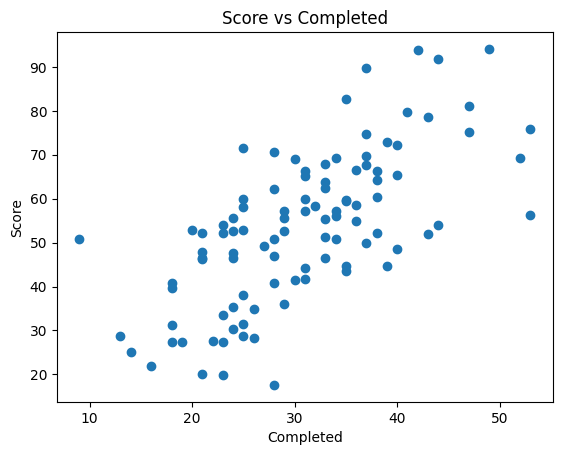

<Figure size 640x480 with 0 Axes>

In [41]:
# Create a scatter plot of score vs completed
plt.scatter(content.completed, content.score)
plt.xlabel('Completed')
plt.ylabel('Score')
plt.title('Score vs Completed')

show_clr()

3. Create and fit a linear regression model that predicts score using completed as the predictor. Print out the regression coefficients.

In [42]:
# Fit a linear regression to predict score based on prior lessons completed
X = sm.add_constant(content.completed)
y = content.score

model = sm.OLS(y, X).fit()
print(model)

4. Write a one-sentence (each) interpretation of the slope and intercept that you printed out in the previous step. Make sure to comment out the interpretation so your code still runs.

In [43]:
# Intercept interpretation:
intercept = model.params[0]
print(f'Intercept: {intercept}')

# Slope interpretation:
slope = model.params[1]
print(f'Slope: {slope}')

Intercept: 13.21411302117958
Slope: 1.306825592807168


5. Plot the same scatter plot that you made earlier (with score on the y-axis and completed on the x-axis), but this time add the regression line on top of the plot. Make sure to show, then clear the plot.
    Do you think this line fits the data well?

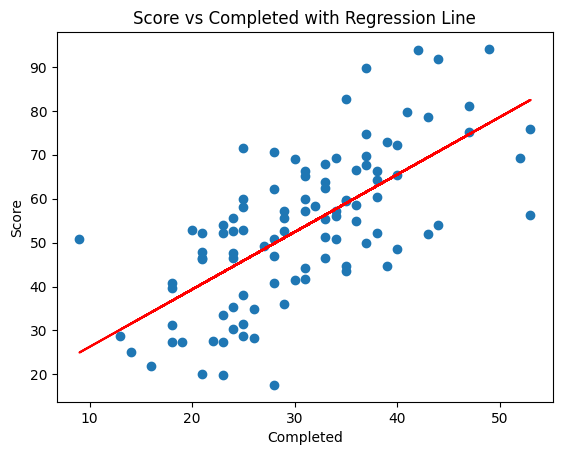

<Figure size 640x480 with 0 Axes>

In [44]:
# Plot the scatter plot with the line on top
plt.scatter(content.completed, content.score)
plt.plot(content.completed, model.predict(), color='red')
plt.xlabel('Completed')
plt.ylabel('Score')
plt.title('Score vs Completed with Regression Line')

show_clr()

6. Use your model to calculate the predicted quiz score for a learner who has previously completed 20 other content items.

In [45]:
# Predict score for learner who has completed 20 prior lessons
new_completed = pd.DataFrame({'const': [1], 'completed': [20]})

predicted_score = model.predict(new_completed)
print(f'Predicted score for 20 completed lessons: {predicted_score}')


Predicted score for 20 completed lessons: 0    39.350625
dtype: float64


7. Calculate the fitted values for your model and save them as fitted_values.

In [46]:
# Calculate fitted values
fitted_values = model.fittedvalues
print(f'Fitted values: {fitted_values}')

Fitted values: 0     58.953009
1     53.725706
2     56.339358
3     45.884753
4     36.736974
        ...    
95    53.725706
96    82.475869
97    43.271102
98    40.657450
99    51.112055
Length: 100, dtype: float64


8. Calculate the residuals for the model and save the result as residuals.

In [47]:
# Calculate residuals
residuals = model.resid
print(f'Residuals: {residuals}')

Residuals: 0     23.746991
1     11.474294
2     -1.039358
3    -17.084753
4     -5.536974
        ...    
95     6.274294
96    -6.675869
97   -15.871102
98     5.942550
99     6.187945
Length: 100, dtype: float64


9. Check the normality assumption for linear regression by plotting a histogram of the residuals. Make sure to show and clear the plot.

    Do the residuals appear to be approximately normally distributed?

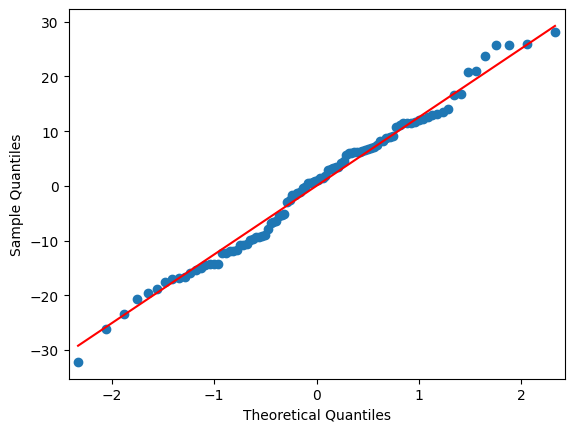

<Figure size 640x480 with 0 Axes>

In [48]:
# Check normality assumption
sm.qqplot(residuals, line='s')

show_clr()

10. Check the homoscedasticity assumption for linear regression by plotting the residuals (y-axis) against the fitted values (x-axis).
    Do you see any patterns or is the homoscedasticity assumption met?
    Do learners who take lesson A or B perform better on the quiz?

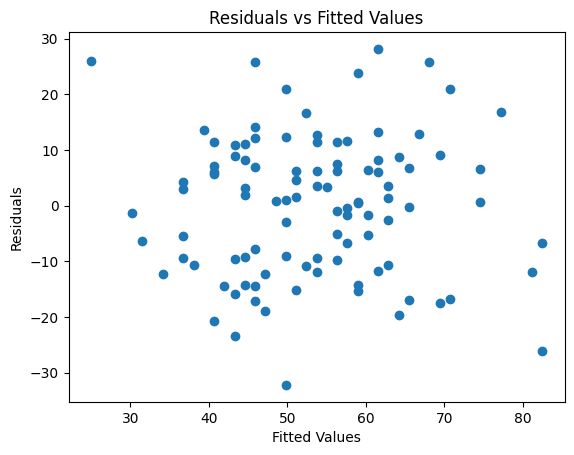

<Figure size 640x480 with 0 Axes>

In [49]:
# Check homoscedasticity assumption
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

show_clr()

11. Let’s now turn our attention to the lessons column to see if learners who took different lessons scored differently on the quiz.
    Use `sns.boxplot` to create a boxplot of score (y-variable) for each lesson (x-variable) to see the relationship between quiz score and which lesson the learner completed immediately before taking the quiz. Make sure to show, then clear the plot.

    Does one lesson appear to do a better job than the other of preparing students for this quiz? If so, which one?



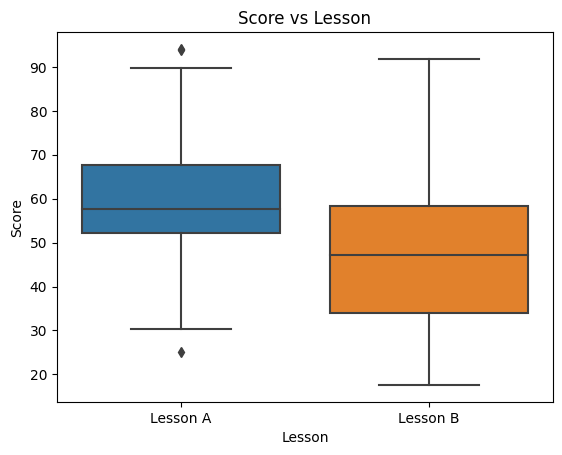

<Figure size 640x480 with 0 Axes>

In [50]:
# Create a boxplot of score vs lesson
sns.boxplot(x=content.lesson, y=content.score)
plt.xlabel('Lesson')
plt.ylabel('Score')
plt.title('Score vs Lesson')

show_clr()

12. Create and fit a linear regression model that predicts score using lesson as the predictor. Print out the regression coefficients.

In [53]:
import patsy

# Use patsy's dmatrices function to create the necessary matrices
y, X_lesson = patsy.dmatrices('score ~ lesson', data=content, return_type='dataframe')

# Fit a linear regression to predict score based on which lesson they took
model_lesson = sm.OLS(y, X_lesson).fit()

# Print out the regression coefficients
print(model_lesson.params)


Intercept             59.220
lesson[T.Lesson B]   -11.642
dtype: float64


13. Calculate and print out the mean quiz scores for learners who took lesson A and lesson B.
    Calculate and print out the mean difference.
    Can you see how these numbers relate to the intercept and slope that you printed out in the linear regression output?

In [54]:
# Calculate and print the group means and mean difference (for comparison)
group_means = content.groupby('lesson').mean()['score']
mean_difference = group_means[1] - group_means[0]
print(f'Mean difference: {mean_difference}')

Mean difference: -11.641999999999996


### Next steps

14. Congratulations! You’ve used a simple linear model to understand how quiz scores are related to other learner actions. In this project, we’ve focused on modeling the relationship between quiz score and one other variable at a time (first we looked at completed, then we looked at lesson separately).

    The next step in linear regression is to model quiz scores as a function of multiple other variables at once! To get a preview of what this might look like visually, let’s try using seaborn‘s lmplot() function to plot a scatter plot of score vs. completed, colored by lesson. For context, the lm in lmplot() stands for “linear model”. This function will automatically plot a linear regression model on top of the scatter plot. The code to implement this looks like:

    ```python
    sns.lmplot(x = 'completed', y = 'score', hue = 'lesson', data = codecademy)
    plt.show()
    ```

    Note that when we include a third variable in our plot using the hue parameter (which controls the color of each point in the scatter plot), something interesting happens! All of a sudden, we end up with multiple regression lines. To find out how to fit and interpret this model, you’ll have to continue learning about linear regression!**

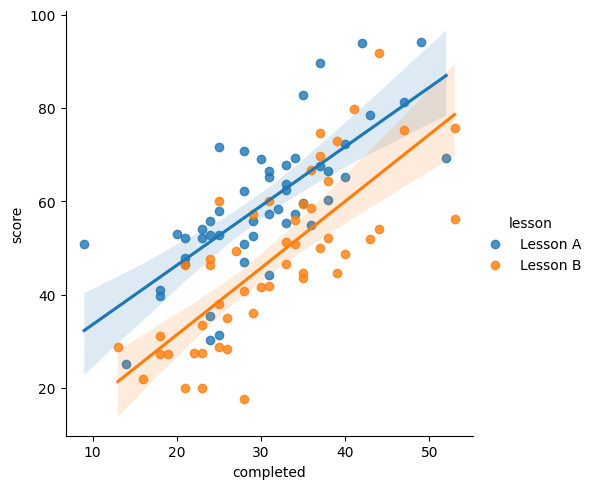

In [55]:
# Use `sns.lmplot()` to plot `score` vs. `completed` colored by `lesson`
data_for_lmplot = content.copy()
data_for_lmplot['lesson'] = data_for_lmplot['lesson'].astype(str)  # Convert lesson column to string type

sns.lmplot(x='completed', y='score', data=data_for_lmplot, hue='lesson')

plt.show()